In [2]:
# import necessary library 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [7]:
data=pd.read_csv('Online Retail.csv',encoding='unicode_escape')

In [8]:
rtl_data=data

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
rtl_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
rtl_data.shape

(541909, 8)

In [27]:
countcust_data=rtl_data[['Country','CustomerID']].drop_duplicates()


## displaying count on customer ID groupby on Country

In [40]:
countcust_data.groupby(['Country'])['CustomerID'].aggregate('count'
                                                           ).reset_index(
).sort_values('CustomerID',ascending=False).head(5)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25


## filtering only take the  united Kingdrom data 

In [44]:
rtl_data= rtl_data.query("Country == 'United Kingdom'").reset_index(drop=True)

## checking for any missing value

In [47]:
rtl_data.isnull().sum(axis= 0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [50]:
rtl_data['CustomerID'].dropna(inplace=True)

## checking negative value on the unit price and quantity  column

In [54]:
rtl_data.Quantity.min()

-80995

In [55]:
rtl_data.UnitPrice.min()

-11062.06

## drop for the negative volumns

In [67]:
rtl_data= rtl_data[rtl_data['UnitPrice'] > 0]

In [73]:
rtl_data= rtl_data[rtl_data['Quantity'] > 0]

## creating total amount for monetary in RFM model later

In [78]:
rtl_data['TotalAmount']=rtl_data['Quantity']*rtl_data['UnitPrice']

In [79]:
rtl_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')

## checking the types for the columns

In [81]:
rtl_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
dtype: object

## converting the type of invoiceDate to the 'Date time' type for time analysis later

In [77]:
rtl_data['InvoiceDate']= pd.to_datetime(rtl_data['InvoiceDate'])

In [194]:
rtl_data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# RFM modeling

## recency = the latest date
## frequency = count of frequenct 
## Monetary = most spent 

In [85]:
rtl_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')

In [83]:
import datetime as dt

In [132]:
## set the latest date
latest_date=dt.datetime(2011,12,10)

## run the RFM modeling

In [238]:
## model the RFM 
RFMScores1= rtl_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()),
    'InvoiceNo': lambda x: len(x),
    'TotalAmount': lambda x: sum(x)
    
})

### conver the type to int for  easier calculation 

In [134]:
RFMScores['InvoiceDate']=RFMScores['InvoiceDate'].astype('timedelta64[D]').astype(int)

In [105]:
#pd.to_numeric(df.Aging.str.split(' days').str[0], errors='coerce')
#pd.to_numeric(RFMScores.InvoiceDate.str.split(' days').str[0])

In [140]:
RFMScores.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

### rename the columns


In [139]:
RFMScores.rename(columns= {
    'InvoiceDate': "Recency",
    'InvoiceNo' : 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

## reset index 

In [196]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4595,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


### statistical analysis of the Recency columns

In [147]:
RFMScores['Recency'].describe()

count    3920.000000
mean       91.742092
std        99.533485
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [148]:
import seaborn as sns


## distribution plot

In [151]:
RFMScores.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

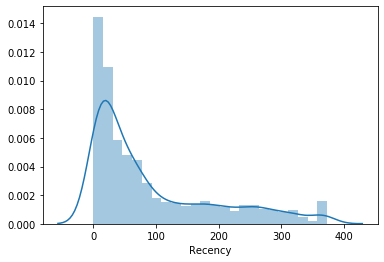

In [249]:
sns.distplot(RFMScores['Recency'])


In [156]:
RFMScores['Frequency'].describe()

count    3920.000000
mean       90.388010
std       217.808385
min         1.000000
25%        17.000000
50%        41.000000
75%        99.250000
max      7847.000000
Name: Frequency, dtype: float64

### plot the frequency distribution 

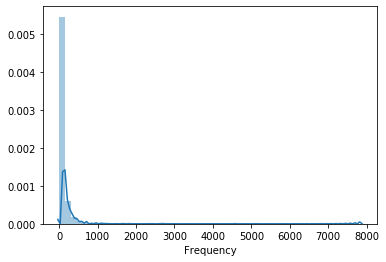

In [248]:
sns.distplot(RFMScores['Frequency'])

### since the distribution mosty fall under 1000 value
### then we either can filter out or just display selected range

## frequency distribution

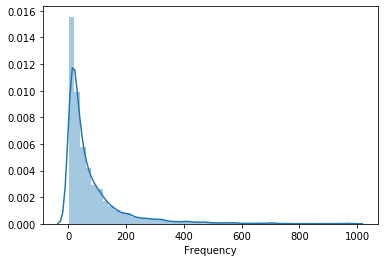

In [159]:
fx=RFMScores['Frequency'][RFMScores['Frequency']<1000]
sns.distplot(fx)

### Monetary describe

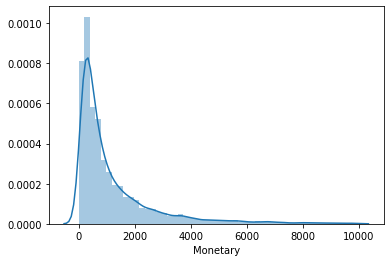

In [172]:
mx=RFMScores['Monetary'][RFMScores['Monetary']<10000]
sns.distplot(mx)


## split the whole dataset  into quantiles (4 set of quantiles)

In [176]:
### split into for segments using quantiles
quantiles=RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles= quantiles.to_dict()

In [177]:
quantiles


{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'Monetary': {0.25: 300.28000000000003,
  0.5: 652.2800000000002,
  0.75: 1576.5850000000005}}

In [180]:
#function to create R F and M segments
def Rscoring(x,p,d):
    if x <= d[p][0.25]: ## because of the lower the recency value, the better 
        return 1       ## we aim for the lower value
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else: 
        return 4

#for the Frequency and Monetary we aiming for the high value
    
def FnMscoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else: 
        return 1




## asigning the RFM value and create the colum for each newly added value

In [189]:
RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles,))
RFMScores['F']=RFMScores['Frequency'].apply(FnMscoring, args=('Frequency',quantiles,))
RFMScores['M']=RFMScores['Monetary'].apply(FnMscoring, args=('Monetary',quantiles,))

In [206]:
RFMScores.columns

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFMGroup'], dtype='object')

In [202]:
RFMScores['RFMGroup']=RFMScores['R'].map(str)+RFMScores['F'].map(str)+RFMScores['M'].map(str)

## create the total score for RFM for segmenatation

In [208]:
RFMScores['rfmscore']=RFMScores['R']+RFMScores['F']+RFMScores['M']

### from now on we can actually sorting customer based on the R or F or M or even multiple variable colectively for insights

In [233]:
RFMScores.sort_values('rfmscore',ascending=False).head(2)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,rfmscore,RFMoyalty
CustomerID,,,,,,,,,
17956.0,249,1,12.75,4,4,4,444,12,Target marketing Utama
18129.0,243,14,112.55,4,4,4,444,12,Target marketing Utama


## assign loyalty label for each class

In [239]:
level_loyalty=['Platinum','Gold','Silve','Bronze']
cutvalue=pd.qcut(RFMScores['rfmscore'],q=4, labels=level_loyalty)
RFMScores['RFMoyalty']=cutvalue

In [240]:
RFMScores.sort_values('Monetary',ascending=False)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,rfmscore,RFMoyalty
CustomerID,,,,,,,,,
18102.0,0,431,259657.30,1,1,1,111,3,Platinum
17450.0,8,337,194550.79,1,1,1,111,3,Platinum
16446.0,0,3,168472.50,1,4,1,141,6,Gold
17511.0,2,963,91062.38,1,1,1,111,3,Platinum
16029.0,38,242,81024.84,2,1,1,211,4,Platinum
...,...,...,...,...,...,...,...,...,...
16878.0,84,3,13.30,3,4,4,344,11,Bronze
17956.0,249,1,12.75,4,4,4,444,12,Bronze
16454.0,44,2,6.90,2,4,4,244,10,Silve


In [241]:
RFMScores[RFMScores['RFMGroup']=='144'].sort_values('Recency',ascending=True).aggregate('count')

Recency      58
Frequency    58
Monetary     58
R            58
F            58
M            58
RFMGroup     58
rfmscore     58
RFMoyalty    58
dtype: int64

## from the result we can play around with the analysis for the segmentation for marketing strategy 

## for example what the approach for customer with good rcency but minimim purchase? 

In [237]:
#rtl_data['rio']='rio'
#rtl_data['gabungan']='bias'
rtl_data['gabunganaja']=rtl_data['rio'].map(str)+' '+rtl_data['gabungan'].map(str)
#rtl_data.drop(columns=[])
rtl_data.head(2
             )

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,rio,gabungan,gabunganaja
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,rio,bias,rio bias
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,rio,bias,rio bias


# visualization the result of the RFM modeling

In [246]:
rtl_data['Country'].value_counts()

United Kingdom    485123
Name: Country, dtype: int64